# Задание.
Возьмите датасет Mortality and Water Hardness
https://www.kaggle.com/ukveteran/mortality-and-water-hardness
В этом датасете содержатся данные по средней годовой смертности на 100000 населения и концентрации кальция в питьевой воде для 61 большого города в Англии и Уэльсе. Города дополнительно поделены на северные и южные.

1. Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?
a. Построить точечный график
b. Рассчитать коэффициенты корреляции Пирсона и Спирмена
c. Построить модель линейной регрессии
d. Рассчитать коэффициент детерминации
e. Вывести график остатков

2. Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
a. Разделить данные на 2 группы
b. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('water.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


In [3]:
df.drop(['Unnamed: 0'], axis='columns', inplace=True)
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [4]:
df.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


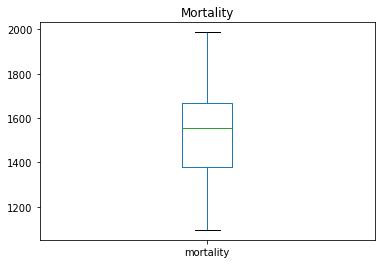

In [5]:
df.mortality.plot(kind='box',
                   title='Mortality')

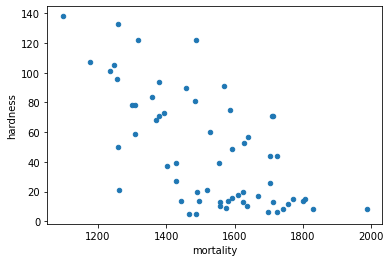

In [6]:
# Построить точечный график.
df.plot(kind='scatter', x='mortality', y='hardness')

In [7]:
# Рассчитать коэффициент корреляции Пирсона
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [8]:
# Рассчитать коэффициент корреляции Спирмена.
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [9]:
df[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


# Комментарии по корреляции:
Согласно графику в данных наблюдается некоторая линейная зависимость, выбросов не замечено. При этом данные не относятся к непрерывным, в связи с чем коэффициент корреляции Пирсона может быть не вполне показательным. В целом нужно отметить близкое значение коэффициентов корреляции Пирсона (-0,65) и Спирмена (-0,63). В то же время коэффициент корреляции Кенделла, который принято считать наиболее консервативным при определении корреляции не непрерывных величин, свидетельствует о меньшей корреляции изучаемых показателей (-0,45). Коэффициент корреляции отрицательный, что означает обратную зависимость одного показателя от другого, т.е. чем более жесткой является вода, тем ниже смертность. На первый взгляд это довольно странно, т.к. общеизвестно, что повышенная жесткость воды негативно влияет на здоровье человека из-за повышенного содержания растворенных в ней солей щелочноземельных металлов, главным образом, кальция и магния. Вместе с тем, качество водопроводной воды в Англии находится на высоком уровне и согласно проведенным еще в 1950 году исследованиям было отмечено, что люди, живущие в районах с жесткой водой, имеют наиболее низкие показатели по сердечным заболеваниям благодаря магнию, содержащемуся в воде.
Возможно, эти два показателя (жесткость воды и смертность) в данном случае вообще никак не связаны, и изучать динамику смертности нужно на основании каких-то иных входных данных.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
X = df[['hardness']] # зависимая переменная (от которой смотрим независимую переменную)
y = df['mortality'] # независимая переменная (что прогнозируем)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 
#train_test_split разделение данных на данные на которых модель обучается и на которых она проверяется

In [13]:
X_train.shape # объем данных для прогноза

(42, 1)

In [14]:
y_train.shape # объем данных для прогноза

(42,)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [16]:
model.coef_ # коэффициент линейной регрессии, k в формуле y_pred = kx + b

array([-3.13167087])

In [17]:
model.intercept_ # независимый коэффициент, b в формуле y_pred = kx + b

1668.9722977277095

In [18]:
# прогнозируем данные для тестовой части выборки
y_test_pred = model.predict(X_test)
y_test_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [19]:
y_train_pred = model.predict(X_train)
y_train_pred

array([1612.60222203, 1515.52042499, 1603.20720941, 1456.01867842,
       1490.46705802, 1236.80171737, 1502.9937415 , 1606.33888028,
       1286.90845133, 1553.10047546, 1405.91194447, 1587.54885505,
       1650.18227249, 1618.86556377, 1383.99024836, 1625.12890552,
       1631.39224726, 1625.12890552, 1628.26057639, 1481.0720454 ,
       1333.88351441, 1643.91893075, 1643.91893075, 1615.7338929 ,
       1374.59523575, 1653.31394337, 1512.38875412, 1387.12191924,
       1584.41718418, 1640.78725988, 1446.62366581, 1440.36032406,
       1643.91893075, 1286.90845133, 1446.62366581, 1531.17877935,
       1424.7019697 , 1628.26057639, 1368.331894  , 1621.99723465,
       1628.26057639, 1653.31394337])

In [20]:
# Коэффициент детерминации
model.score(X_test, y_test) 

0.5046490611017092

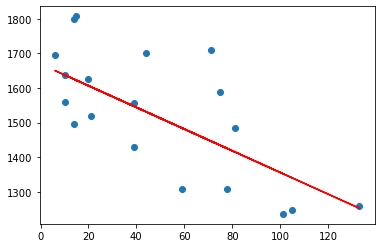

In [21]:
# Выводим линию линейной регрессии на основании тестовых данных
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, c='r')

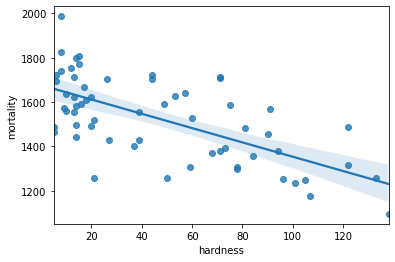

In [22]:
sns.regplot(x='hardness', y='mortality', data=df)

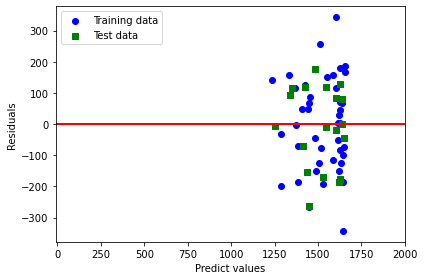

In [23]:
# Residuals plot
plt.scatter(y_train_pred, y_train_pred - y_train,
           c = 'blue', marker = 'o', label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
           c = 'green', marker = 's', label = 'Test data')
plt.xlabel('Predict values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y=0, xmin=-10, xmax=2000, lw=2, color='red')
plt.xlim([-10,2000])
plt.tight_layout()

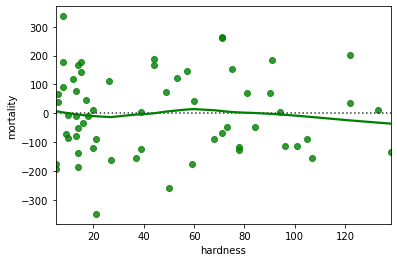

In [24]:
sns.residplot(x=X, y=y, lowess=True, color="g")

# Комментарии по регрессии:
Коэффициент детерминации (0,50) свидетельствует о средней детерминации, остатки распределены хаотично относительно линии регрессии, что свидетельствует об относительной достоверности модели.

При этом коэффициент детерминации отдельно по модели линейной регрессии для южных и северных городов свидетельствуют об очень низком качестве модели. В случае с южными городами коэффициент детерминации отрицательный (-2.55), модель бесполезна, по северным городам (0.018) значение также близкое к нулю. Одной из причин, по моему мнению, м.б. недостаточность данных, т.к. для построения общей модели у нас были показатели всего по 61 городу, при делении по регионам их стало еще меньше, и в случае с южными городами сами показатели сметности и жесткости являются довольно разбросанными. 

In [25]:
# Альтернативный способ из statsmodel
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [27]:
X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу

In [28]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Sat, 09 Jan 2021   Prob (F-statistic):           7.83e-06
Time:                        00:06:43   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

In [29]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1668.972298
hardness      -3.131671
dtype: float64
R2:  0.3967890100912279


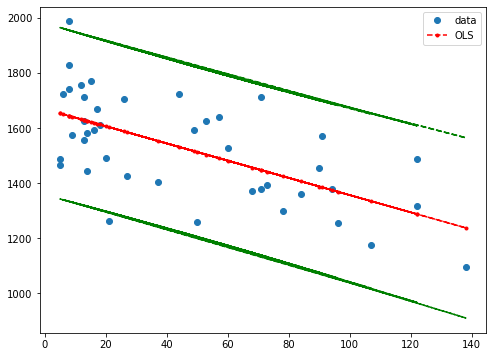

In [30]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

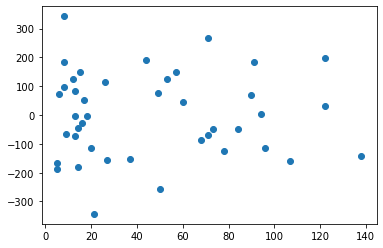

In [31]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([1., 1., 7., 5., 8., 4., 8., 6., 1., 1.]),
 array([-3.43207209e+02, -2.74578382e+02, -2.05949554e+02, -1.37320726e+02,
        -6.86918979e+01, -6.30700817e-02,  6.85657578e+01,  1.37194586e+02,
         2.05823414e+02,  2.74452241e+02,  3.43081069e+02]),
 <a list of 10 Patch objects>)

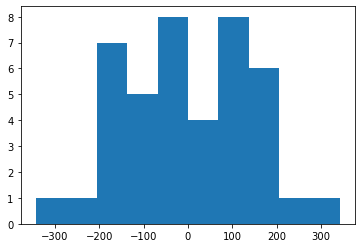

In [32]:
plt.hist(results.resid)

# Для южных городов

In [33]:
df_south = df.loc[(df['location'] == 'South')]
df_south.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73


In [34]:
df_south.describe()

,mortality,hardness
count,26.000000,26.000000
mean,1376.807692,69.769231
std,140.269175,40.360682
min,1096.000000,5.000000
25%,1259.250000,40.250000
50%,1364.000000,75.500000
75%,1485.750000,99.750000
max,1627.000000,138.000000


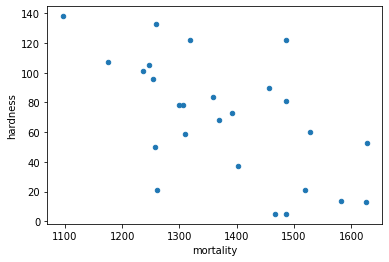

In [35]:
df_south.plot(kind='scatter', x='mortality', y='hardness')

In [36]:
df_south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [37]:
df_south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [65]:
df_south[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.440315
hardness,-0.440315,1.000000


In [38]:
X = df_south[['hardness']]
y = df_south['mortality']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [40]:
model_south = LinearRegression()
model_south.fit(X_train, y_train)

LinearRegression()

In [41]:
model_south.coef_

array([-3.51342921])

In [42]:
model_south.intercept_

1640.2204603423374

In [43]:
y_test_pred = model_south.predict(X_test)
y_train_pred = model_south.predict(X_train)

In [44]:
model_south.score(X_test, y_test)

-2.551922301235205

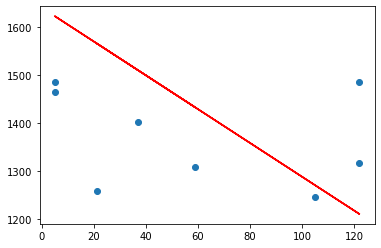

In [45]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, c='r')

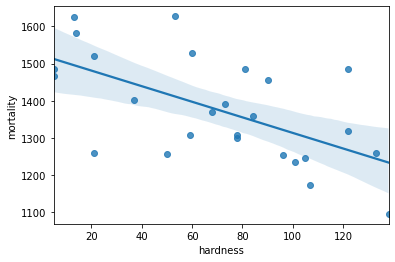

In [46]:
sns.regplot(x='hardness', y='mortality', data=df_south)

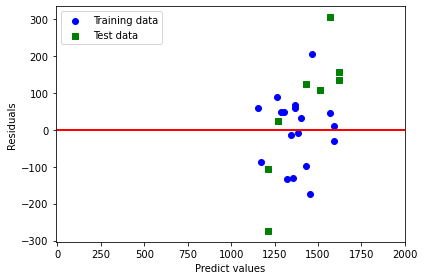

In [47]:
# Residuals plot
plt.scatter(y_train_pred, y_train_pred - y_train,
           c = 'blue', marker = 'o', label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
           c = 'green', marker = 's', label = 'Test data')
plt.xlabel('Predict values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y=0, xmin=-10, xmax=2000, lw=2, color='red')
plt.xlim([-10,2000])
plt.tight_layout()

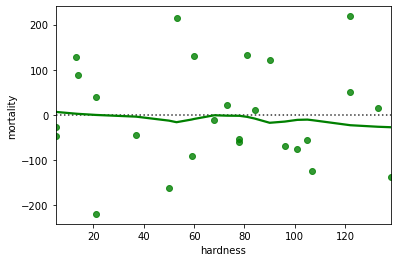

In [48]:
sns.residplot(x=X, y=y, lowess=True, color="g")

# Для северных городов

In [49]:
df_north = df.loc[(df['location'] == 'North')]
df_north.head()

,location,town,mortality,hardness
1,North,Birkenhead,1668,17
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15


In [50]:
df_north.describe()

,mortality,hardness
count,35.000000,35.000000
mean,1633.600000,30.400000
std,136.936911,26.134494
min,1378.000000,6.000000
25%,1557.500000,12.500000
50%,1637.000000,17.000000
75%,1718.000000,44.000000
max,1987.000000,94.000000


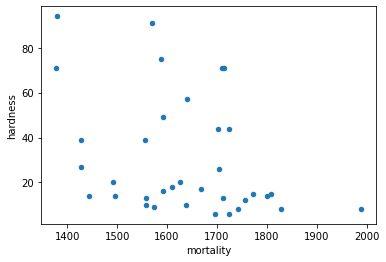

In [51]:
df_north.plot(kind='scatter', x='mortality', y='hardness')

In [52]:
df_north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [53]:
df_north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [66]:
df_north[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.283058
hardness,-0.283058,1.000000


In [54]:
X = df_north[['hardness']]
y = df_north['mortality']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [56]:
model_north = LinearRegression()
model_north.fit(X_train, y_train)

LinearRegression()

In [57]:
model_north.coef_

array([-1.97686226])

In [58]:
model_north.intercept_

1688.150229031281

In [59]:
y_test_pred = model_north.predict(X_test)
y_train_pred = model_north.predict(X_train)

In [60]:
model_north.score(X_test, y_test)

0.018885304285745863

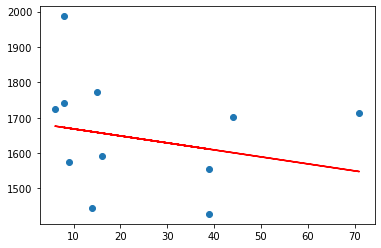

In [61]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, c='r')

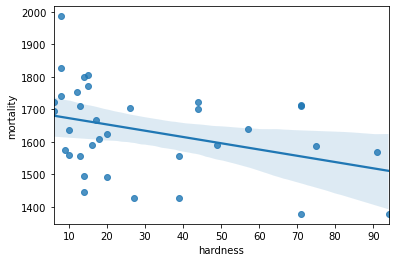

In [62]:
sns.regplot(x='hardness', y='mortality', data=df_north)

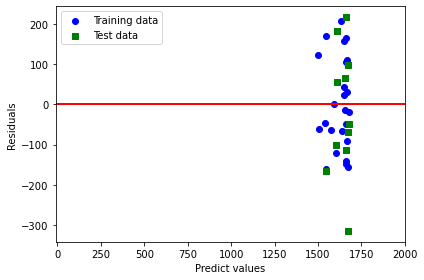

In [63]:
# Residuals plot
plt.scatter(y_train_pred, y_train_pred - y_train,
           c = 'blue', marker = 'o', label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
           c = 'green', marker = 's', label = 'Test data')
plt.xlabel('Predict values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y=0, xmin=-10, xmax=2000, lw=2, color='red')
plt.xlim([-10,2000])
plt.tight_layout()

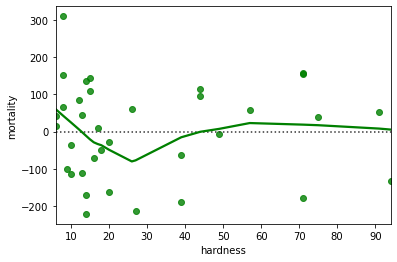

In [64]:
sns.residplot(x=X, y=y, lowess=True, color="g")